# Anime-Recommender-System-Project-2025

## 📌Challenge Description 

In today’s technology-driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?


<center>
  <img src='https://mostaql.hsoubcdn.com/uploads/thumbnails/1450164/661a5b0c8a072/dataset-card.jpg' width='500'/>
</center>



Well, you are about to find out! In this project, we require to use all skills to build a collaborative and content-based recommender system for a collection of anime titles, capable of accurately predicting how a user will rate an anime title they have not yet viewed, based on their historical preferences.

The dataset consists of thousands of users and thousands of anime titles, gathered from myanimelist.net.

<center>
  <img src="recommender%20systems.webp" width="400"/>
</center>


What value does building a functional recommender system bring?

Providing an accurate and reliable solution to this challenge has significant economic potential, as users are introduced to anime they are likely to enjoy or purchase—boosting revenue and fostering platform loyalty.

With anime's increasing popularity, users often struggle to find shows that match their interests.  
Traditional search methods are time-consuming, and many rely on reviews that may not be tailored to their preferences.  
A **personalized recommender system** can help solve this problem by analyzing user ratings and suggesting relevant anime.  


## Dataset Description
#### Source 
This dataset contains information on anime content (movies, television series, music, specials, OVA, and ONA*), split between a file related to the titles (anime.csv) and one related to user ratings of the titles (training.csv). The test.csv file will be used to create the rating predictions and must be submitted for grading. The submissions.csv file illustrates the expected format of submissions.

*OVA: Original Video Animation - anime film / series made for release in home-video formats, ONA: Original Net Animation is an anime that is directly released onto the Internet.

#### Supplied files:
- anime.csv: This file contains information about the anime content, including aspects such as the id, name, genre, type, number of episodes (if applicable), an average rating based on views, and the number of members in the anime 'group'.

- train.csv:This file contains rating data, supplied by individual users for individual anime titles. It contains user_id information, the anime_id of the title watched, and the rating given (if applicable).

- test.csv: This file will be used to create the final submission. It contains a user_id and an anime_id column only - no rating (that's your task!). These ids will be used to create the rating predictions.

- submission.csv:This file is for illustrative purposes only, showing the submission format for the final predictions.

--- 

###  Problem Statement  
The goal is to design a **data-driven anime recommendation model** that can:  
- Understand user preferences based on past ratings  

- Suggest new anime that align with those preferences  

- Improve user engagement by offering accurate recommendations  

---

### Objectives  
- **Analyze the dataset** to understand user interactions with anime.  
- **Build a collaborative filtering model** to provide recommendations.  
- **Evaluate the model’s accuracy** and fine-tune for better performance.  
- **Generate personalized recommendations** based on user interests.  

---
### Submissions format:
For every user_id in the dataset, submission files should contain two columns: ID and rating. ID is a concatenation of the user_id and anime_id given in the test file (using an _ character). rating is the predicted rating for a given user-anime pair. Also see the included submissions file.

The file should contain a header and have the following format: <br>
`ID,rating` <br>
`1_2011,1.0` <br>
 
---
### Next Steps 🚀  
🔹 Load and explore the dataset.  
🔹 Perform data cleaning and visualization.  
🔹 Implement the recommender system.  

Let's begin! 👇"""
    }
]

<a id="cont"></a>
## 📑 Table of Contents    

<a href=#one>1. Import packages and Loading Data</a>

<a href=#two>2. Data Cleaning</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data preprocessing</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusion</a>

<a href=#eight>8. References</a>


### Connecting Comet
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading Comet ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used to save the notebook version in comet. |

In [3]:
!pip install comet_ml
import comet_ml
# import comet_ml at the top of your file
from comet_ml import Experiment

'!pip install comet_ml\nimport comet_ml\n# import comet_ml at the top of your file\nfrom comet_ml import Experiment'

<a id="one"></a>
###  1. Importing packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import re
from html import unescape
import html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity as CS
import heapq
import operator 
import scipy as sp 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as sch
import mlflow
from sklearn.manifold import trustworthiness
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split as tts
from surprise import accuracy
from surprise import SVDpp
from surprise.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Multiply, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import mixed_precision
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<a id="one"></a>
### Loading  Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the files into DataFrames. |

---

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
anime_df = pd.read_csv('anime.csv')

#### Viewing the first 5 rows of each dataframe 

In [6]:
anime_df.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [7]:
train_df.head(3)

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10


In [8]:
test_df.head(3)

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281


In [9]:
sample_sub = pd.read_csv('submission.csv')
print(sample_sub.shape)
sample_sub.head()

(3, 2)


,ID,rating
0,14862_1232,5.3
1,14862_7974,4.0
2,24873_2349,6.0


In [10]:
list_of_all_dataframes = [train_df, test_df, anime_df]

for each in list_of_all_dataframes:
    print(each.shape)

(5703555, 3)
(633686, 2)
(12294, 7)


From above, it is observed that:
- Train has - 5703555 rows, and 3 columns
- Tets has - 633686 rows, and 2 columns
- Anime has - 12294 rows, and 7 columns


<a id="two"></a>
### 2.Data Cleaning
<a href=#cont>Back to Table of Contents</a>

---
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
| In this section you are required to clean the each dataset.  |

---

<a id="two"></a>
#### 2.1. Missing value
<a href=#cont>Back to Table of Contents</a>

---

This code checks for missing values in three datasets: anime_df, train_df, and test_df. It uses the `.isnull().sum()` function to count the number of missing values in each column of the respective DataFrames. The results are printed to help identify any gaps in the data that may need to be handled before further analysis or modeling.

---

In [11]:
# Check for missing values
print("Missing values in anime_df:")
print(anime_df.isnull().sum())
print("\nMissing values in train_df:")
print(train_df.isnull().sum())
print("\nMissing values in test_df:")
print(test_df.isnull().sum())

Missing values in anime_df:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in train_df:
user_id     0
anime_id    0
rating      0
dtype: int64

Missing values in test_df:
user_id     0
anime_id    0
dtype: int64


<a id="two"></a>
#### 2.2 Drop Duplicates
<a href=#cont>Back to Table of Contents</a>

---

This code removes duplicate rows from the anime_df, train_df, and test_df DataFrames using the `.drop_duplicates(inplace=True)` method. Removing duplicates ensures data consistency and prevents redundant information from affecting analysis or model training. The inplace=True parameter modifies the DataFrame directly without needing to assign it to a new variable.

---

In [12]:
# Remove duplicates if any
anime_df.drop_duplicates(inplace=True)
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

<a id="two"></a>
#### 2.3. Cleaning anime_df
<a href=#cont>Back to Table of Contents</a>

---

This function, clean_anime_df(df), is designed to clean and preprocess an anime dataset by ensuring data consistency, handling missing values, and standardizing text formatting.

---

In [13]:
from html import unescape  # ✅ Import unescape to avoid NameError
import re
import pandas as pd

def clean_anime_df(df):
    # Ensure anime_id is unique and non-null
    assert df['anime_id'].is_unique, "anime_id column has duplicate values."
    assert df['anime_id'].notnull().all(), "anime_id column has null values."
    df['anime_id'] = df['anime_id'].astype(int)

    # Function to clean names and unescape HTML entities
    def clean_name(name):
        name = unescape(name)  # ✅ Convert HTML entities to characters
        name = name.lower().strip()  # Convert to lowercase and strip whitespace
        name = name.replace("&#039;", "'").replace("°", "")
        name = re.sub(r'[^a-zA-Z0-9\s\.\,\-\&\:\;\']', '', name)  # Remove unwanted special characters
        return name

    # Apply the cleaning function to the 'name' column
    df['name'] = df['name'].apply(clean_name)

    # Handle missing values in 'genre' and split into lists
    df['genre'] = df['genre'].fillna('')
    df['genre'] = df['genre'].apply(lambda x: x.split(', '))

    # Standardize genre lists
    df['genre'] = df['genre'].apply(lambda genres: [genre.strip().lower() for genre in genres])

    # Standardize the 'type' column
    df['type'] = df['type'].str.lower().str.strip().fillna('unknown')

    # Ensure episodes is numeric and handle missing values
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(-1).astype(int)

    # Ensure rating is numeric and handle missing values
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(-1.0)

    # Ensure members is numeric and handle missing values
    df['members'] = pd.to_numeric(df['members'], errors='coerce').fillna(0).astype(int)

    return df

In [14]:
# Clean the dataframes
anime_df = clean_anime_df(anime_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned anime_df:\n{anime_df.head()}')

Cleaned anime_df:
   anime_id                              name  \
0     32281                    kimi no na wa.   
1      5114  fullmetal alchemist: brotherhood   
2     28977                           gintama   
3      9253                       steins;gate   
4      9969                          gintama'   

                                               genre   type  episodes  rating  \
0             [drama, romance, school, supernatural]  movie         1    9.37   
1  [action, adventure, drama, fantasy, magic, mil...     tv        64    9.26   
2  [action, comedy, historical, parody, samurai, ...     tv        51    9.25   
3                                 [sci-fi, thriller]     tv        24    9.17   
4  [action, comedy, historical, parody, samurai, ...     tv        51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


<a id="two"></a>
#### 2.4. Cleaning train data
<a href=#cont>Back to Table of Contents</a>

---
This function cleans the train_df DataFrame, ensuring that user_id, anime_id, and rating are valid and properly formatted

---


In [15]:
# Define function to clean train_df
def clean_train_df(df):
    # Ensure user_id and anime_id are non-null and numeric
    df = df.dropna(subset=['user_id', 'anime_id'])
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
    df['anime_id'] = pd.to_numeric(df['anime_id'], errors='coerce')

    # Handle ratings: ensure they are integers and within a valid range
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

    # Option 1: Filter out rows where rating is -1, ensuring rating remains an integer
    df = df[df['rating'] != -1]

    # Remove remaining rows with NaN values that could not be converted
    df.dropna(subset=['user_id', 'anime_id', 'rating'], inplace=True)

    # Ensure the remaining ratings are within the valid range
    df = df[(df['rating'] >= 1) & (df['rating'] <= 10)]
    df['rating'] = df['rating'].astype(int)  # Ensure rating column is of integer type

    return df

In [16]:
# Clean the dataframes
train_df = clean_train_df(train_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned train_df:\n{train_df.head()}')

Cleaned train_df:
   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8


<a id="two"></a>
#### 2.5. Cleaning test data
<a href=#cont>Back to Table of Contents</a>

---
This function cleans the test_df DataFrame by ensuring that user_id and anime_id are valid numeric values and do not contain missing or invalid entries

---

In [17]:
# Define function to clean test_df
def clean_test_df(df):
    # Ensure user_id and anime_id are non-null and numeric
    df = df.dropna(subset=['user_id', 'anime_id'])
    df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
    df['anime_id'] = pd.to_numeric(df['anime_id'], errors='coerce')

    # Remove rows with NaN values that could not be converted
    df.dropna(subset=['user_id', 'anime_id'], inplace=True)

    return df

In [18]:
# Clean the dataframes
test_df = clean_test_df(test_df)

# Display the first few rows of the cleaned dataframes for verification
print(f'Cleaned test_df:\n{test_df.head()}')

Cleaned test_df:
   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281
3    55290       165
4    72323     11111


<a id="three"></a>
### 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

---
| ⚡ Description: Exploratory Data Analysis (EDA)  ⚡ |
| :--------------------------- |
| In this section we explore the distribution of the data, summarise the datasets and plot graphs to uncover patterns and key insights to inform for further analysis and modeling. |

---

<a id="three"></a>
#### 3.1 EDA on anime_df
<a href=#cont>Back to Table of Contents</a>

---
- Summary Statistics: Get an overview of the dataset.

- Distribution of Anime Types: Analyze the types of anime (e.g., TV, Movie, OVA).

- Distribution of Genres: Analyze the genres and their frequency.

- Rating Distribution: Visualize the distribution of anime ratings.

- Members Distribution: Analyze the distribution of the number of members who have rated the anime.

---

In [19]:
# Summary statistics for anime_df
print("Summary statistics for anime_df:")
print(anime_df.describe())

Summary statistics for anime_df:
           anime_id      episodes        rating       members
count  12294.000000  12294.000000  12294.000000  1.229400e+04
mean   14058.221653     12.012445      6.334078  1.807134e+04
std    11455.294701     46.264788      1.435287  5.482068e+04
min        1.000000     -1.000000     -1.000000  5.000000e+00
25%     3484.250000      1.000000      5.820000  2.250000e+02
50%    10260.500000      2.000000      6.550000  1.550000e+03
75%    24794.500000     12.000000      7.170000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06


<a id="three"></a>
#### 3.2. Distribution of Rating
<a href=#cont>Back to Table of Contents</a>

---
This code visualizes the distribution of anime ratings in the dataset using a histogram with Kernel Density Estimation (KDE).

---


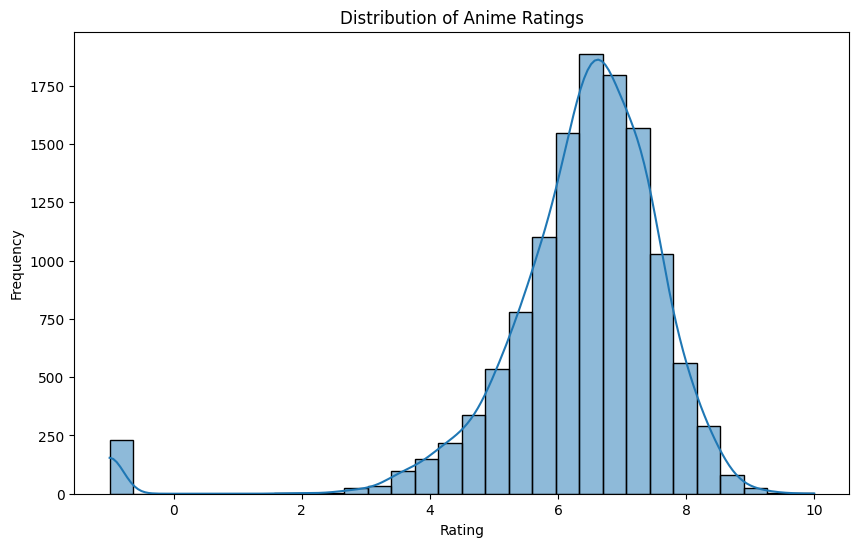

In [20]:
# Distribution of anime ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<a id="three"></a>
#### 3.3. Distribution of Number of Members
<a href=#cont>Back to Table of Contents</a>

---
This code visualizes the distribution of the number of members (viewers) for each anime in the dataset using a histogram with a Kernel Density Estimate (KDE).

---

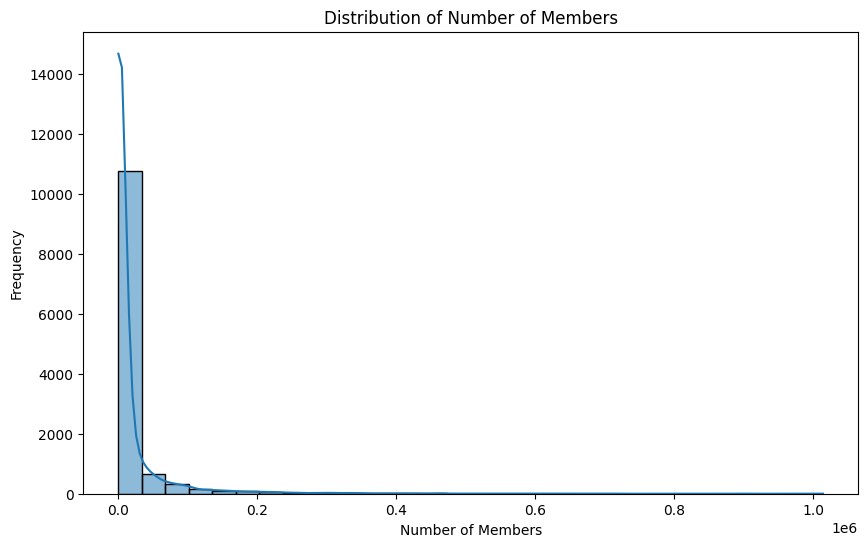

In [21]:
# Distribution of number of members
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['members'], bins=30, kde=True)
plt.title('Distribution of Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.show()

<a id="three"></a>
#### 3.4. Rating by Anime Type
<a href=#cont>Back to Table of Contents</a>

---
This code creates a box plot to visualize the distribution of anime ratings for different types of anime.

---

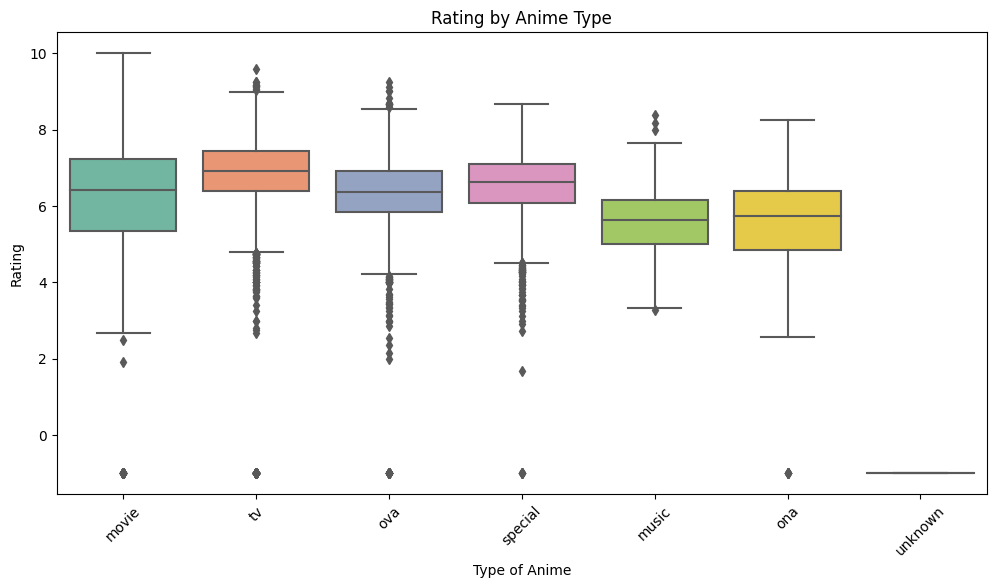

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_df, palette="Set2")  # Try 'husl', 'coolwarm', 'pastel', etc.
plt.title('Rating by Anime Type')
plt.xlabel('Type of Anime')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


<a id="three"></a>
#### 3.5. Top 10 Most Popular Anime
<a href=#cont>Back to Table of Contents</a>

---
This code generates a horizontal bar plot to visualize the top 10 most popular anime based on the number of members.

---

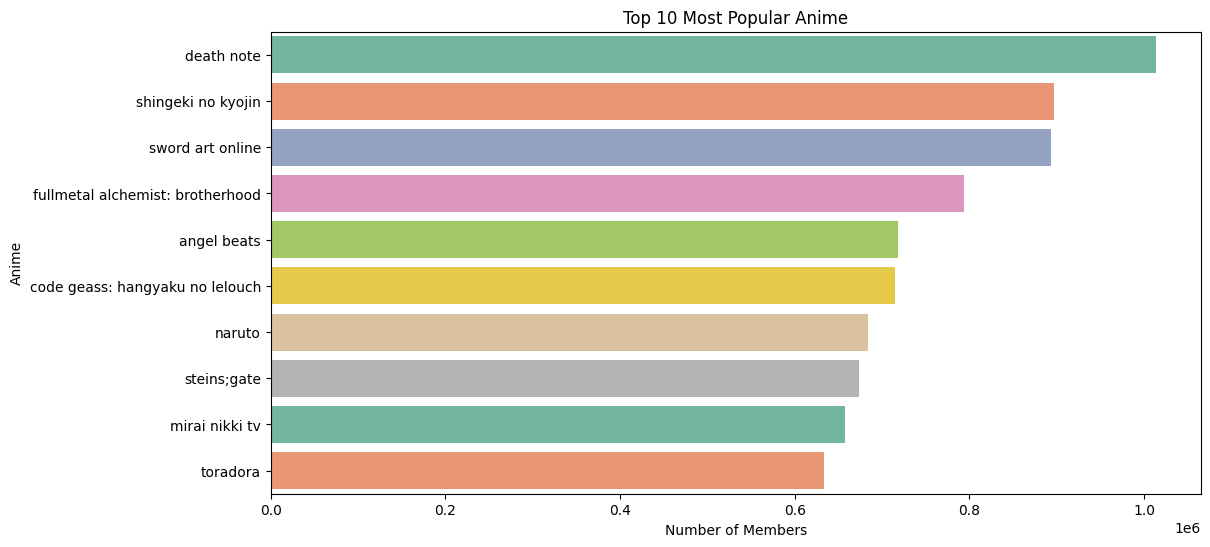

In [23]:
# Top 10 most popular anime
top_10_anime = anime_df.sort_values(by='members', ascending=False).head(10)

# Define a custom color palette with distinct colors
colors = sns.color_palette("Set2", len(top_10_anime))  # You can change "Set2" to other palettes like "Set1", "Paired", etc.

plt.figure(figsize=(12, 6))
sns.barplot(x='members', y='name', data=top_10_anime, palette=colors, orient='h')
plt.title('Top 10 Most Popular Anime')
plt.xlabel('Number of Members')
plt.ylabel('Anime')
plt.show()


<a id="three"></a>
#### 3.6. Correlation Matrix
<a href=#cont>Back to Table of Contents</a>


---
This code generates a correlation matrix heatmap to visualize relationships between numerical variables (rating, members, and episodes) in the anime dataset.

---


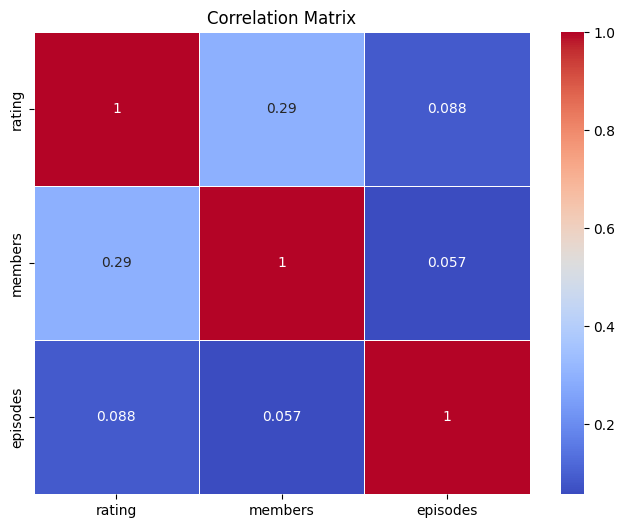

In [24]:
# Correlation matrix
corr_matrix = anime_df[['rating', 'members', 'episodes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<a id="three"></a>
#### 3.7. User Rating Distribution
<a href=#cont>Back to Table of Contents</a>

---
This code visualizes the distribution of user ratings in the train_df dataset using a histogram.

---


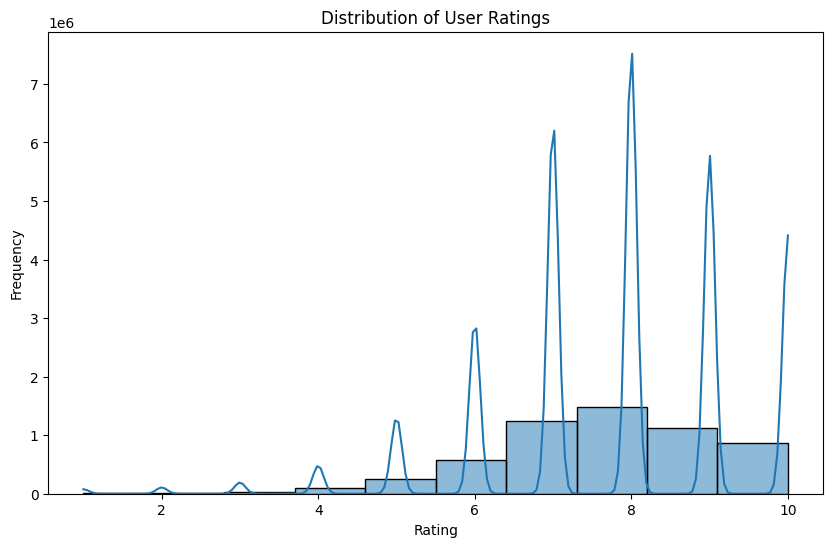

In [25]:
# Distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<a id="three"></a>
#### 3.8. Top Rated Animes by Users.
<a href=#cont>Back to Table of Contents</a>

---
This code visualizes the top 10 highest-rated anime by users based on their average ratings.

---

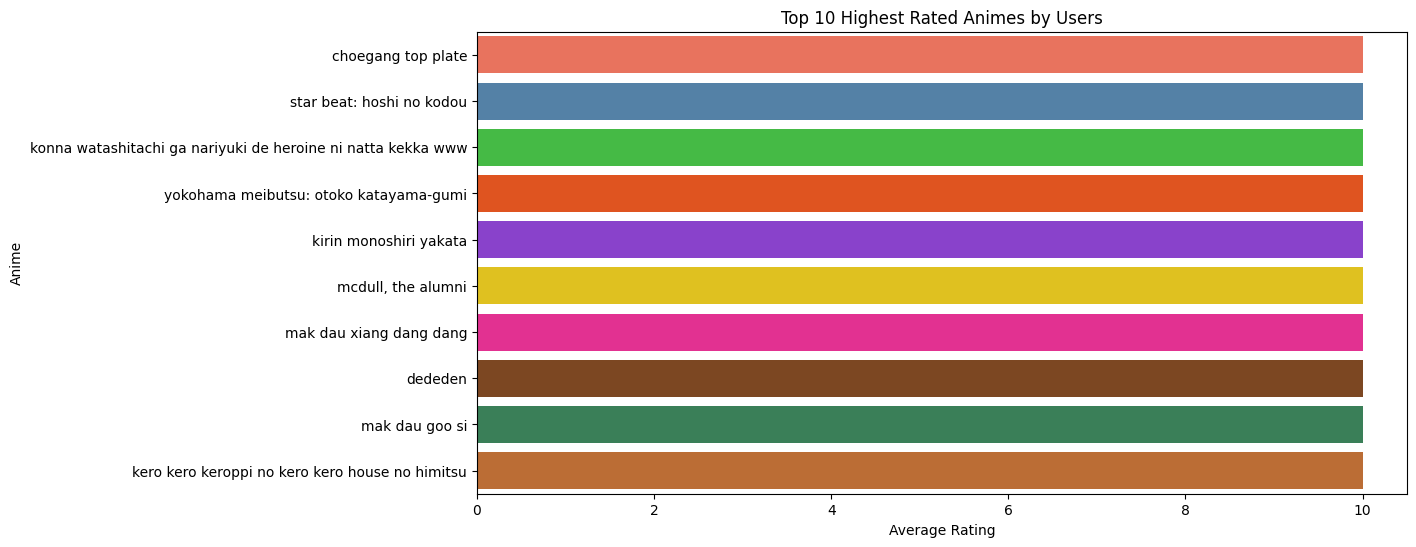

In [26]:
# Top rated animes by users
top_rated_animes = train_df.groupby('anime_id').mean()['rating'].sort_values(ascending=False).head(10).reset_index()
top_rated_animes = top_rated_animes.merge(anime_df[['anime_id', 'name']], on='anime_id')

# Define a custom list of colors for the bars (you can replace these with any color codes you like)
colors = ['#FF6347', '#4682B4', '#32CD32', '#FF4500', '#8A2BE2', '#FFD700', '#FF1493', '#8B4513', '#2E8B57', '#D2691E']

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name', data=top_rated_animes, palette=colors, orient='h')
plt.title('Top 10 Highest Rated Animes by Users')
plt.xlabel('Average Rating')
plt.ylabel('Anime')
plt.show()


<a id="four"></a>
### 4. Data Preprocessing
<a href=#cont>Back to Table of Contents</a>

---
| ⚡ Description: Data Preprocessing  ⚡ |
| :--------------------------- |
| In this section,  |

---

##### Anime_df

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# This is for the models and its added by me, Sanele
or_anime_df = anime_df
# Ensure 'genre' is a string before processing
anime_df['genre'] = anime_df['genre'].astype(str)

# Use CountVectorizer to create a one-hot encoded matrix for genres
vectorizer = CountVectorizer(tokenizer=lambda x: x.strip("[]").replace("'", "").split(", "))
genre_matrix = vectorizer.fit_transform(anime_df['genre'])

# Convert the matrix to a DataFrame
genre_df = pd.DataFrame(genre_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate one-hot encoded genres with the original DataFrame
anime_df = pd.concat([anime_df, genre_df], axis=1)

# Display anime_df
anime_df.head()


,anime_id,name,genre,type,episodes,rating,members,,action,adventure,...,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire,yaoi,yuri
0,32281,kimi no na wa.,"['drama', 'romance', 'school', 'supernatural']",movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,fullmetal alchemist: brotherhood,"['action', 'adventure', 'drama', 'fantasy', 'm...",tv,64,9.26,793665,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,28977,gintama,"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.25,114262,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,steins;gate,"['sci-fi', 'thriller']",tv,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,gintama',"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.16,151266,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### Train_df

In [28]:
### Merge train_df with anime_df to include anime details
'''

train_df = train_df.merge(anime_df, on='anime_id', how='left')

# Normalize ratings
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df['rating_x'] = scaler.fit_transform(train_df[['rating_x']])

'''

# Display train_df
train_df.head()


,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


##### Test_df

In [29]:
# Merge test_df with anime_df to include anime details
#test_df = test_df.merge(anime_df, on='anime_id', how='left')
# Display test_df
test_df.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


<a id="five"></a>
### 5. Model Training
<a href=#cont>Back to Table of Contents</a>

---
| ⚡ Description: Model training ⚡ |
| :--------------------------- |
|In this section,
1️⃣ Select a Model – Work through the algorithm, that includes Content-based and Collaborative filtering.
2️⃣ Split Data – Divide into training, validation, and test sets.
3️⃣ Train the Model – Feed data so the model learns patterns.|

---


<a id="five"></a>
#### 5.1. Content-Based Filtering
<a href=#cont>Back to Table of Contents</a>

---
| ⚡ Description: Content-Based Filtering ⚡ |
| :--------------------------- |
In this section, content-based recommendation algorithms and models are developed. The models are built using the recommendation algorithms as the foundation.

---


##### *5.1.1. Cosine Similarity Matrix Recommender*

---
Since the recommender system in content-based filtering does not assume any prior knowledge about the user asking for recommendations, it is difficult to measure how good the recommendations made by the recommender are. We have chosen to use one base algorithm as the ground truth for assessing how good the recommender is. This allows us to use `Precision` and `Recall` methods to measure the relevance of the recommendations. `Precision` measures how many of the top-K recommended items are actually relevant and `Recall` measures how many of the relevant items were successfully recommended in the top-K. We can then use `F1` as our balance between `Precision` and `Recall`. Starting with the cosine similarity for content based recommender

---

In [30]:
# We use the anime_df
anime_df['anime_tags'] = (pd.Series(anime_df[['genre', 'type']]
                          .fillna('')
                          .values.tolist()).str.join(' '))

anime_df['anime_tags'].head()

0    ['drama', 'romance', 'school', 'supernatural']...
1    ['action', 'adventure', 'drama', 'fantasy', 'm...
2    ['action', 'comedy', 'historical', 'parody', '...
3                            ['sci-fi', 'thriller'] tv
4    ['action', 'comedy', 'historical', 'parody', '...
Name: anime_tags, dtype: object

In [31]:
anime_titles = anime_df['name']

indices = pd.Series(anime_df.index, index=anime_df['name'])

In [32]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3),
                             min_df=0.0, stop_words='english')

anime_tags_vector_matrix = vectorizer.fit_transform(anime_df['anime_tags'])

In [33]:
cs_anime_tags = CS(anime_tags_vector_matrix,
                   anime_tags_vector_matrix)

cs_anime_tags.shape

(12294, 12294)

In [34]:
def ground_truth_recommendations(anime_title, k=10):

    def sort_by_similarity(item):
        return item[1]


    title_index = indices[anime_title]

    sim_scores = list(enumerate(cs_anime_tags[title_index].tolist()))
    sim_scores = sorted(sim_scores, key=sort_by_similarity, reverse=True)
    sim_scores = sim_scores[1:k]

    anime_indices = [i[0] for i in sim_scores]

    return list(anime_titles.iloc[anime_indices])

Now that we have the ground truth model, we implement the `Precision`, `Recall` and `F1` functions


In [35]:
def precision_at_k(recommended, ground_truth, k):
    recommended_k = recommended[:k]  # Select top-K recommendations
    relevant_items = set(recommended_k) & set(ground_truth)
    return len(relevant_items) / k

def recall_at_k(recommended, ground_truth, k):
    recommended_k = recommended[:k]  # Select top-K recommendations
    relevant_items = set(recommended_k) & set(ground_truth)
    return len(relevant_items) / len(ground_truth) if ground_truth else 0

def f1_at_k(recommended, ground_truth, k):
    precision = precision_at_k(recommended, ground_truth, k)
    recall = recall_at_k(recommended, ground_truth, k)
    if precision + recall == 0:
        return 0  # Avoid division by zero
    return 2 * (precision * recall) / (precision + recall)

In [36]:
print(len(train_df))
print(len(anime_df))

5703554
12294


In [37]:
len(anime_df['name'].unique())

12273

##### *Cosine Similarity Matrix Rating Predictor*

We use the cosine similarity matrix from 5.1.1. to generate predictions of the ratings.

In [38]:
def rating_predictor(anime_title, user, rating_data, k=20, threshold=0.0):

    def get_similarity(neighbor):
        return neighbor[0]

    title_index = indices[anime_title]
    neighbors = []

    for index, row in rating_data[rating_data['user_id']==user].iterrows():
        sim = cs_anime_tags[title_index-1, indices[row['name']]-1]
        if isinstance(sim, np.ndarray):
            if sim.shape == (2,):
                sim = sim[0]
            elif sim.size == 1:
                sim = sim.item()
        neighbors.append((sim, row['rating']))
    k_neighbors = sorted(neighbors, key=get_similarity, reverse=True)[:k]

    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        predictedRating = np.mean(rating_data[rating_data['name']==anime_title]['rating'])

    return round(predictedRating, 0)

In [39]:
ratings = train_df.merge(anime_df[['anime_id', 'name']],
                         on='anime_id', how='left')
ratings.head()

,user_id,anime_id,rating,name
0,1,11617,10,high school dxd
1,1,11757,10,sword art online
2,1,15451,10,high school dxd new
3,2,11771,10,kuroko no basket
4,3,20,8,naruto


In [40]:
title = "mob psycho 100"
user_id = 5
actual_rating = ratings[(ratings['user_id'] == user_id) & (ratings['name'] == title)]['rating'].values[0]
#actual_rating = None
pred_rating = rating_predictor(anime_title=title, user=user_id, rating_data=ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - mob psycho 100
---
Actual rating: 		 9
Predicted rating: 	 6.0


In [41]:
ratings[ratings['user_id'] == 5]

,user_id,anime_id,rating,name
89,5,6,8,trigun
90,5,15,6,eyeshield 21
91,5,17,6,hungry heart: wild striker
92,5,18,6,initial d fourth stage
93,5,20,6,naruto
...,...,...,...,...
496,5,30831,8,kono subarashii sekai ni shukufuku wo
497,5,31240,8,re:zero kara hajimeru isekai seikatsu
498,5,31722,7,nanatsu no taizai: seisen no shirushi
499,5,32182,9,mob psycho 100


In [42]:
anime_df['anime_tags']

0        ['drama', 'romance', 'school', 'supernatural']...
1        ['action', 'adventure', 'drama', 'fantasy', 'm...
2        ['action', 'comedy', 'historical', 'parody', '...
3                                ['sci-fi', 'thriller'] tv
4        ['action', 'comedy', 'historical', 'parody', '...
                               ...                        
12289                                       ['hentai'] ova
12290                                       ['hentai'] ova
12291                                       ['hentai'] ova
12292                                       ['hentai'] ova
12293                                     ['hentai'] movie
Name: anime_tags, Length: 12294, dtype: object

In [43]:
base_model_ratings = train_df.groupby('anime_id')['rating'].mean().reset_index()
base_model_ratings = pd.DataFrame(base_model_ratings)
base_model_ratings.fillna(base_model_ratings['rating'].mean(), inplace=True)

In [44]:
base_model_ratings

,anime_id,rating
0,1,8.866166
1,5,8.446497
2,6,8.414669
3,7,7.531937
4,8,7.194030
...,...,...
9833,34324,5.909091
9834,34325,7.357143
9835,34349,7.000000
9836,34367,5.333333


In [45]:
base_model = pd.merge(test_df, base_model_ratings, how='left')
base_model.sort_values(by='user_id', inplace=True)

In [46]:
base_model['ID'] = base_model['user_id'].astype(str) + '_' + base_model['anime_id'].astype(str)

base_model = base_model[['ID', 'rating']]
base_model

,ID,rating
590213,1_8074,7.673601
613843,3_5114,9.323551
356777,3_20583,8.712891
477168,3_23321,7.753709
111841,3_20507,8.225646
...,...,...
386021,73515_6919,6.663883
83187,73515_1165,6.887755
316880,73515_13599,7.586948
560460,73515_27,7.617737


In [47]:
base_model.fillna(base_model['rating'].mean(), inplace=True)

In [48]:
base_model.isnull().sum()

ID        0
rating    0
dtype: int64

In [49]:
base_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633686 entries, 590213 to 335960
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      633686 non-null  object 
 1   rating  633686 non-null  float64
dtypes: float64(1), object(1)
memory usage: 14.5+ MB


##### 5.1.2. *Cluster Recommendation Systems*

In [50]:
or_anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,kimi no na wa.,"['drama', 'romance', 'school', 'supernatural']",movie,1,9.37,200630
1,5114,fullmetal alchemist: brotherhood,"['action', 'adventure', 'drama', 'fantasy', 'm...",tv,64,9.26,793665
2,28977,gintama,"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.25,114262
3,9253,steins;gate,"['sci-fi', 'thriller']",tv,24,9.17,673572
4,9969,gintama',"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.16,151266


In [51]:
or_anime_df['episodes'].max()

1818

In [52]:
or_anime_df['rounded_rating'] = or_anime_df['rating'].round(0)
or_anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,rounded_rating
0,32281,kimi no na wa.,"['drama', 'romance', 'school', 'supernatural']",movie,1,9.37,200630,9.0
1,5114,fullmetal alchemist: brotherhood,"['action', 'adventure', 'drama', 'fantasy', 'm...",tv,64,9.26,793665,9.0
2,28977,gintama,"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.25,114262,9.0
3,9253,steins;gate,"['sci-fi', 'thriller']",tv,24,9.17,673572,9.0
4,9969,gintama',"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.16,151266,9.0


In [53]:
or_anime_df['rounded_rating'] = or_anime_df['rounded_rating'].astype(int)
or_anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,rounded_rating
0,32281,kimi no na wa.,"['drama', 'romance', 'school', 'supernatural']",movie,1,9.37,200630,9
1,5114,fullmetal alchemist: brotherhood,"['action', 'adventure', 'drama', 'fantasy', 'm...",tv,64,9.26,793665,9
2,28977,gintama,"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.25,114262,9
3,9253,steins;gate,"['sci-fi', 'thriller']",tv,24,9.17,673572,9
4,9969,gintama',"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.16,151266,9


In [54]:
or_anime_df['selected_feats'] = or_anime_df['genre'] + ' ' + or_anime_df['type'] + ' ' +or_anime_df['genre'].astype(str)

In [55]:
or_anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,rounded_rating,selected_feats
0,32281,kimi no na wa.,"['drama', 'romance', 'school', 'supernatural']",movie,1,9.37,200630,9,"['drama', 'romance', 'school', 'supernatural']..."
1,5114,fullmetal alchemist: brotherhood,"['action', 'adventure', 'drama', 'fantasy', 'm...",tv,64,9.26,793665,9,"['action', 'adventure', 'drama', 'fantasy', 'm..."
2,28977,gintama,"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.25,114262,9,"['action', 'comedy', 'historical', 'parody', '..."
3,9253,steins;gate,"['sci-fi', 'thriller']",tv,24,9.17,673572,9,"['sci-fi', 'thriller'] tv ['sci-fi', 'thriller']"
4,9969,gintama',"['action', 'comedy', 'historical', 'parody', '...",tv,51,9.16,151266,9,"['action', 'comedy', 'historical', 'parody', '..."


In [56]:
tfidf_vectors = TfidfVectorizer(min_df=0.0, stop_words='english')

In [57]:
vector_matrix = tfidf_vectors.fit_transform(or_anime_df['selected_feats'])

We now implement the methods we will use for clustering and dimensionality reduction. Due to the amount of data, KMeans clustering was the most suitable clustering method because other methods such as Agglomerative clustering and Gaussian Mixture Model clustering could not be completed due to hardware limitations. MDS was also not considered for dimensionality reduction for the same reasons. So the methods used for dimensionality reduction are PCA and t-SNE.

Let's create plots to determine the optimal number of clusters for our data. We will consider Elbow methods, Silhouette score, Davis-Bouldin index (DB index) and the Calinski-Harabasz score for choosing the optimal number of clusters.

In [58]:
cluster_range = range(2, 21)

wcss = []
bcss = []
silhouette_scores = []
dbi_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(vector_matrix)
    labels = kmeans.predict(vector_matrix)

    wcss.append(kmeans.inertia_)
    overall_mean = np.mean(vector_matrix.toarray(), axis=0)
    cluster_centers = kmeans.cluster_centers_
    bcss_value = np.sum([np.linalg.norm(center - overall_mean) ** 2 for center in cluster_centers])
    bcss.append(bcss_value)
    s_score = silhouette_score(vector_matrix, labels)
    silhouette_scores.append(s_score)
    dbi_score = davies_bouldin_score(vector_matrix.toarray(), labels)
    dbi_scores.append(dbi_score)


Starting with the Within Cluster Sum of Squares (WCSS). WCSS measures how close data points are to their cluster centers and in this method we look for the "elbow" (a point) where the WCSS socre stops decreasing significantly. This point gives us the optimal k value. Ideally we want this elbow to occur at lower WCSS scores since lower WCSS scores mean tighter clusters, and tighter clusters mean better clustering.

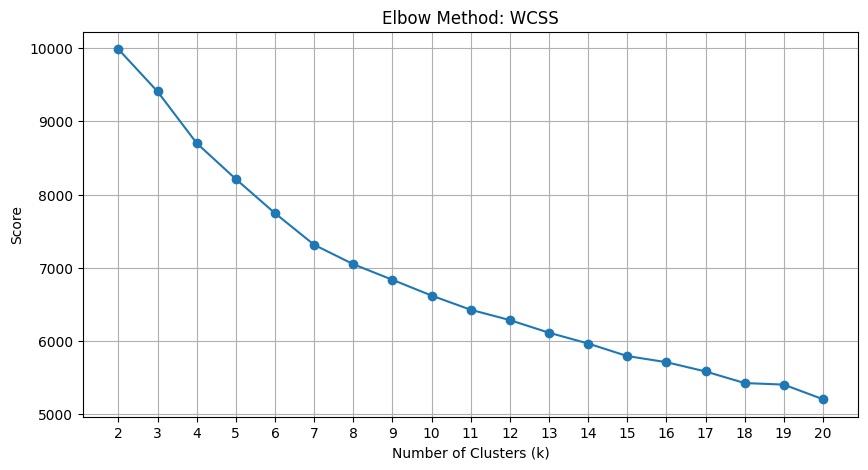

In [59]:
# WCSS Elbow method
plt.figure(figsize=(10, 5))

plt.plot(cluster_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("Elbow Method: WCSS")
plt.xticks(cluster_range)
plt.grid()
plt.show()

Using the elbow method with WCSS there is a slight elbow at k = 7 but it is not clear enough. There is a clear elbow at k = 18 and, even though the WCSS score is low at this point, this k value is too high. Too high k values can lead to over segmentation and reduced cluster interpretability. Moreover, higher k values are computationally demanding and we are limited by hardware. We should consider what other elbow methods suggest.

Moving on to the elbow method using Between Cluster Sum of Squares (BCSS). BCSS measures how well-separated different clusters are. This method is similar in interpretation to the WCSS elbow method except the curve is vertically inverted and we look for a high BCSS score for the optimal k value since high BCSS socres mean clusters are far apart (good separation).

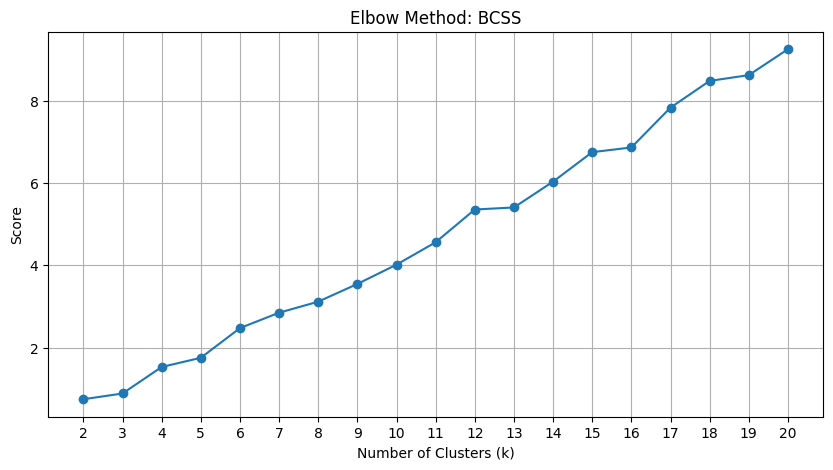

In [60]:
# BCSS Elbow Method
plt.figure(figsize=(10, 5))

plt.plot(cluster_range, bcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("Elbow Method: BCSS")
plt.xticks(cluster_range)
plt.grid()
plt.show()

Using the elbow method with BCSS, there is no clear plateau to the trend but there are slight elbows at 4 and 6 which are the values to be considered for k. The BCSS score at these k values is quite low, meaning these values may not be optimal. Other elbows occur at higher values like 12 and 15 but these are too high for k and are undesirable for the reasons mentioned before about high k values.

Let's look at the Silhouette scores at different k values. The Silhouette score measures how well each point fits within its cluster compared to other clusters. This score ranges for -1 to 1 with 1 being the desired score and -1 the opposite.

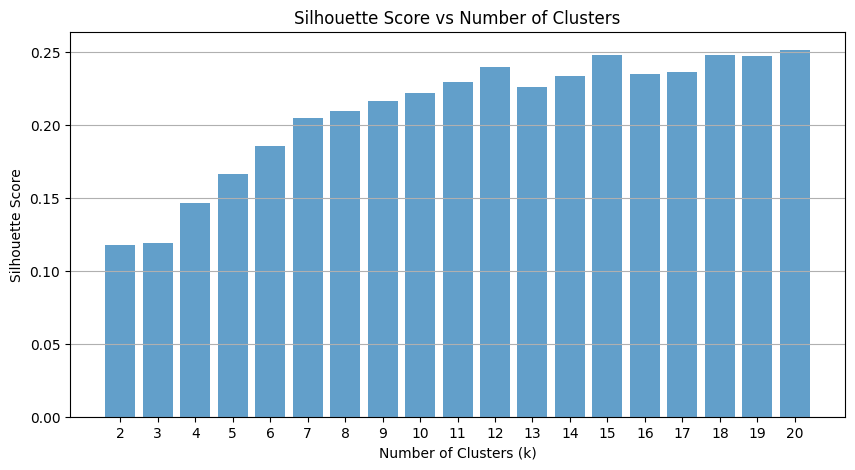

In [61]:
# Silhouette scores
plt.figure(figsize=(10, 5))
plt.bar(cluster_range, silhouette_scores, alpha=0.7)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.xticks(cluster_range)
plt.grid(axis='y')
plt.show()

The silhouette scores suggest k value of 11 and this value might be too high for clusters. The scores are in the positives but are closer to 0 than they are to 1.

The Davis-Bouldin Index (DB index) measures the average similarity ratio of each cluster with its most similar cluster, where similarity is based on the cluster's scatter (within-cluster distance) and separation (between-cluster distance). A lower DB index indicates better clustering, as it suggests clusters are compact and well-separated. Let's look at the plot.

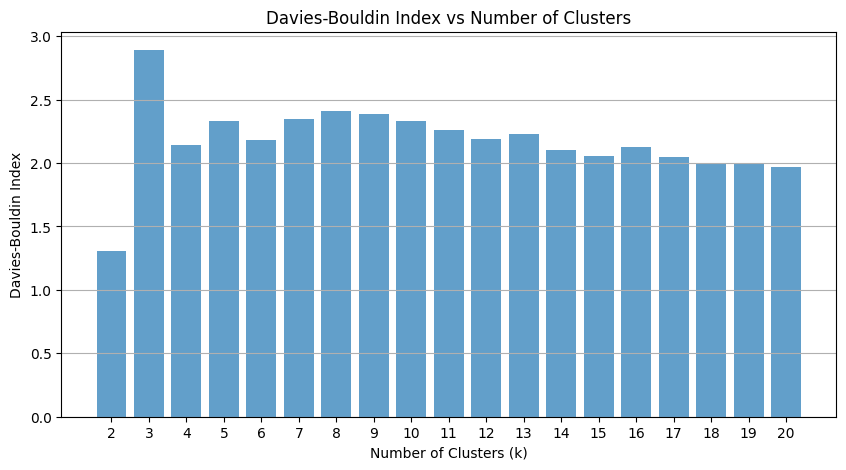

In [62]:
plt.figure(figsize=(10, 5))
plt.bar(cluster_range, dbi_scores, alpha=0.7)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xticks(cluster_range)
plt.grid(axis='y')
plt.show()

The DB index suggests a k value of 2 but this would make the ckusters too simplistic. The next lowest value is 20 but this would be be too high. The best values to pick from are 4 and 6. The DB index values range is generally low with the maximum value at under 3 which is good.

The Davis-Bouldin Index (DB index) measures the average similarity ratio of each cluster with its most similar cluster, where similarity is based on the cluster's scatter (within-cluster distance) and separation (between-cluster distance). A lower DB index indicates better clustering, as it suggests clusters are compact and well-separated. Let's look at the plot.

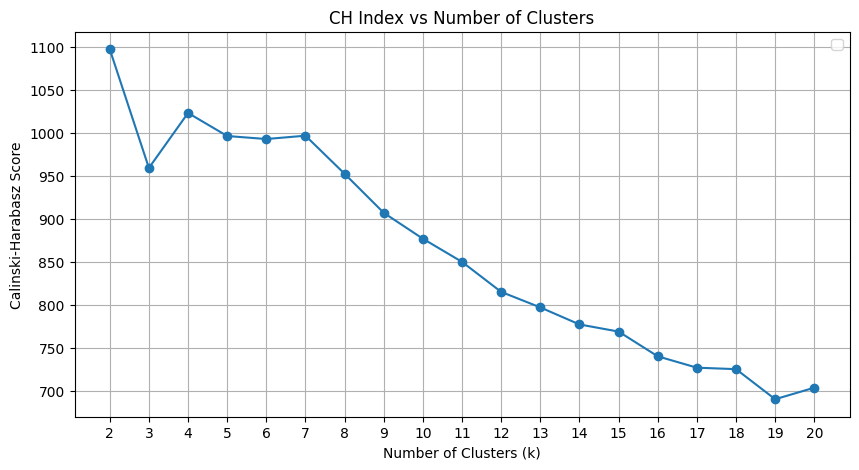

In [63]:
ch_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(vector_matrix)

    score = calinski_harabasz_score(vector_matrix.toarray(), labels)
    ch_scores.append(score)


plt.figure(figsize=(10, 5))
plt.plot(cluster_range, ch_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("CH Index vs Number of Clusters")
plt.xticks(cluster_range)
plt.legend()
plt.grid()
plt.show()

The CH index figure suggests 2 clusters but this may make the models too simplistic. Clusters between 4 and 7 seem to be appropriate accordig to the CH index because clusters beyond 7 give an ever decreasing CH index value and we ideally want to pick a k value where this index is high.

We now look at the last method which is a dendogram. A dendrogram is a tree-like diagram that visually represents the arrangement of clusters at different levels of similarity or distance. We determine the optimal number of clusters by observing where to cut the tree horizontally to form distinct clusters. In this dendogram we only used 2000 entries for the dendogram because of hardware limitations. Using all of the data would result in excessive memory usage which would make it impossible to run the whole notebook.

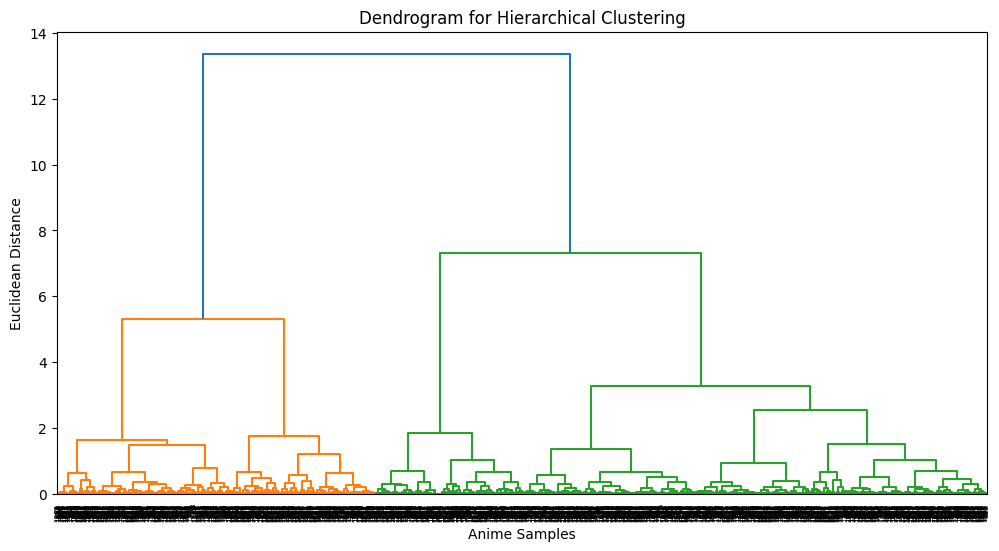

In [66]:
# Trying a dendrogram
h_pca = PCA(n_components=2, random_state=42)
reduced_data = h_pca.fit_transform(vector_matrix.toarray())

linkage_matrix = sch.linkage(reduced_data[:2000], method='ward')

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, truncate_mode="level", p=20)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Anime Samples")
plt.ylabel("Euclidean Distance")
plt.show()

The dendrogram suggests 3 to 6 clusters where the gaps are large enough between distances, suggesting a clear seperation between clusters. 

The methods used to determine the number of clusters use different criteria for selecting k which led to the descripancy in the suggested optimal k value. Considering our bias to have low number of clusters we have opted to try the values 3 and 6, which were also the most popular in the methods used. For visualization, we have chosen dimensional reduction techniques that will reduce the dimensions of the data to 2 dimensions. Let's look at these methods:

Starting with PCA and 3 number of clusters reduced to 2 features.

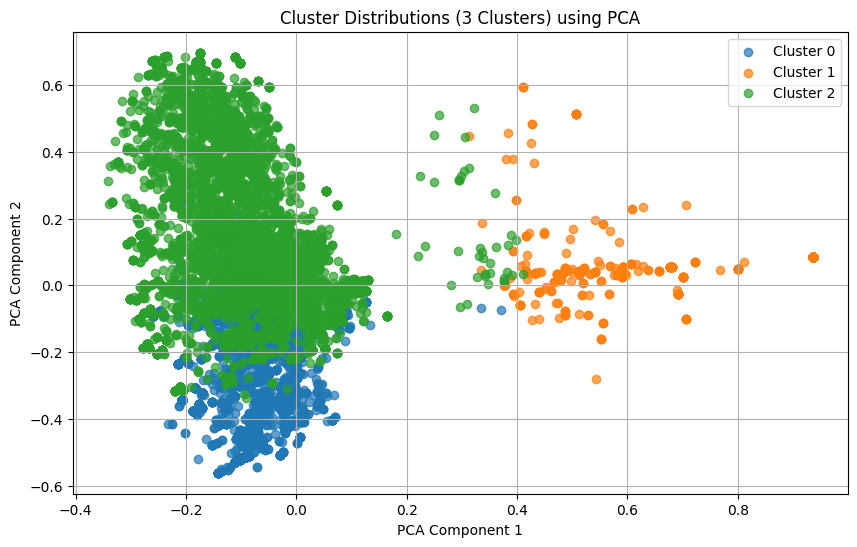

In [67]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k3_df  = or_anime_df
k3_df['cluster_label'] = kmeans.fit_predict(vector_matrix)

k3_pca = PCA(n_components=2)
k3_pca_components = k3_pca.fit_transform(vector_matrix.toarray())

k3_pca_df = pd.DataFrame(k3_pca_components, columns=['PCA1', 'PCA2'])
k3_pca_df['cluster_label'] = k3_df['cluster_label']

plt.figure(figsize=(10, 6))
for label in range(3):
    cluster_data = k3_pca_df[k3_pca_df['cluster_label'] == label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {label}", alpha=0.7)

plt.title("Cluster Distributions (3 Clusters) using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

With k = 3, a large number of data points seem to be overlapping. There isn't a clear seperation between cluster 0 and cluster 2, particularly in the middle where they meet. Let's see k = 6 with PCA.

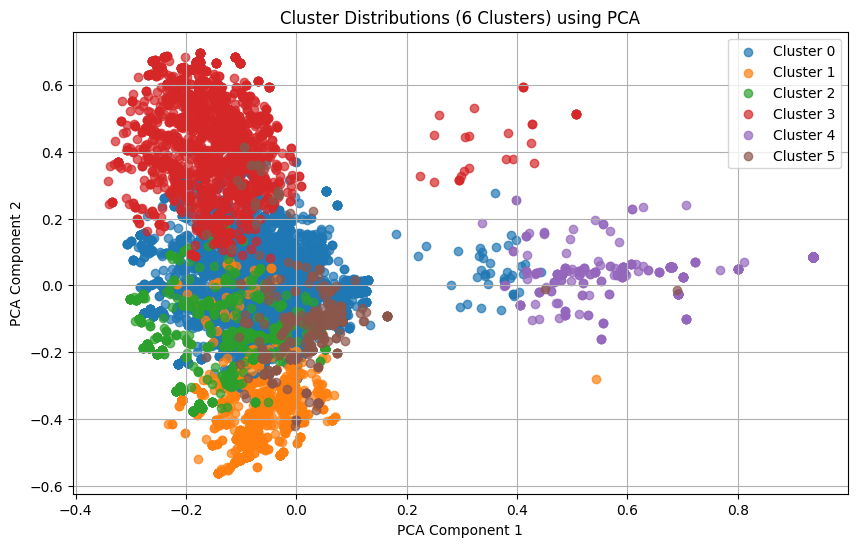

In [68]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
k6_df  = or_anime_df
k6_df['cluster_label'] = kmeans.fit_predict(vector_matrix)

k6_pca = PCA(n_components=2)
k6_pca_components = k6_pca.fit_transform(vector_matrix.toarray())

k6_pca_df = pd.DataFrame(k6_pca_components, columns=['PCA1', 'PCA2'])
k6_pca_df['cluster_label'] = k6_df['cluster_label']

plt.figure(figsize=(10, 6))
for label in range(6):
    cluster_data = k6_pca_df[k6_pca_df['cluster_label'] == label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f"Cluster {label}", alpha=0.7)

plt.title("Cluster Distributions (6 Clusters) using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

With k = 6, things seem to be worse. The PCA is not doing a good job at seperating the clusters. Let's look at the explained varaince ratio of the selected number of components.

In [69]:
print(f'Explained Variance Ratio of the two PCA components: {round(k6_pca.explained_variance_ratio_.sum()*100, 2)}%')

Explained Variance Ratio of the two PCA components: 16.93%


With an explained variance ratio of around 17%, this explains the poor cluster formations. With such a low variance ratio this suggests that these two components capture only a small portion of the variability in the data. This indicates that the dataset likely has many dimensions or features contributing to its variance, and reducing it to just two components might result in significant loss of information. Let's try to get the variance ratio at higher number of components. These will not be visualized since they will have more than 3 dimenions.

In [70]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
k6_30_df  = or_anime_df
k6_30_df['cluster_label'] = kmeans.fit_predict(vector_matrix)
n = 30
k6_30_pca = PCA(n_components=n)
k6_30_pca_components = k6_30_pca.fit_transform(vector_matrix.toarray())

pca_cols = [f'PCA{i}' for i in range(1, n+1)]

k6_30_pca_df = pd.DataFrame(k6_30_pca_components, columns=pca_cols)
k6_30_pca_df['cluster_label'] = k6_30_df['cluster_label']

In [71]:
print(f'Explained Variance Ratio of the fifty PCA components: {round(k6_30_pca.explained_variance_ratio_.sum()*100, 2)}%')

Explained Variance Ratio of the fifty PCA components: 90.53%


With the number of components set to 30, we get at least 90% of the variance in the original data explained by the chosen principal components. We will keep this model for recommendations and we will also keep the model with 2 principal components for the purpose of comparison when making recommendations.

Let's now implement a model using t-SNE with 6 `KMeans` clusters.

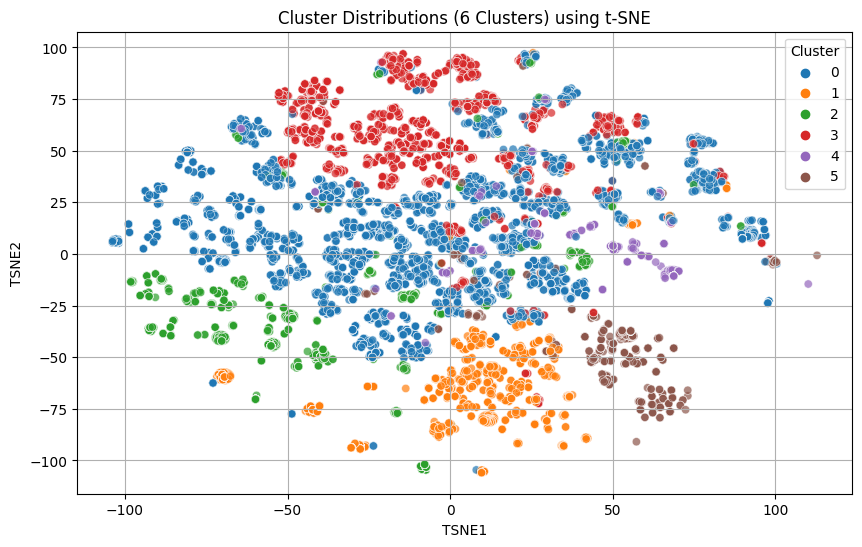

In [72]:
tk6_df = or_anime_df
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
tk6_df['cluster_label'] = kmeans.fit_predict(vector_matrix)

k6_tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
k6_tsne_components = k6_tsne.fit_transform(vector_matrix.toarray())

k6_tsne_df = pd.DataFrame(k6_tsne_components, columns=['TSNE1', 'TSNE2'])
k6_tsne_df['cluster_label'] = tk6_df['cluster_label']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster_label', palette='tab10', data=k6_tsne_df, alpha=0.7)
plt.title("Cluster Distributions (6 Clusters) using t-SNE")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

6 clusters for t-SNE looks better. Now we want to know if t-SNE preserved the original structure of the data after feature reduction. It is important to check this because. For this we use a metric in the manifold module from Scikit-Learn library called trustworthiness. Trustworthiness measures how well local relationships are preserved after dimensionality reduction by computing the rank of nearest neighbors before and after reduction. This score is between 0 and 1, with 1 meaning the structure is 100% preserved and 0 meaning the structure is completely different. Ideally we want the score to be above 0.8. Let's compute the score for n_neighors = 10 and n_neighbors = 500 to check both the local and global structure preservation.

In [78]:
local_score = trustworthiness(vector_matrix.toarray(), k6_tsne_components, n_neighbors=10)
global_score = trustworthiness(vector_matrix.toarray(), k6_tsne_components, n_neighbors=500)
print(f"Local Structure Trustworthiness Score: {local_score:.4f}")
print(f"Global Structure Trustworthiness Score: {global_score:.4f}")

Local Structure Trustworthiness Score: 0.9970
Global Structure Trustworthiness Score: 0.8442


Both the local and global structure trustworthiness scores are comfortably above 0.8. This means t-SNE has kept the structure of the original data after feature reduction.

Let'simplement an algorithm to get recommendations based on the PCA with 2 principal components.

In [79]:
def recommend_anime_pca2(input_anime, df, pca_df, top_n=10):

    if input_anime not in df['name'].values:
        print("Anime not found in dataset.")
        return 'Anime Not Found'

    title_index = df[df['name'] == input_anime].index[0]

    input_cluster = df.loc[title_index, 'cluster_label']

    input_pca_vector = pca_df.iloc[title_index, :-1].values.reshape(1, -1)

    similarities = CS(input_pca_vector, pca_df.iloc[:, :-1])
    similarities = similarities.flatten()

    similar_indices = similarities.argsort()[::-1][1:top_n+1]

    recommendations = list(df.iloc[similar_indices]['name'])

    return recommendations

Let's implement an algorithm to get recommendations based on the PCA with 30 principal components (and over 90% of the explained variance ratio).

In [80]:
def recommend_anime_pca30(input_anime, df, pca_df, top_n=10):

    if input_anime not in df['name'].to_numpy():
        return None

    title_index = df[df['name'] == input_anime].index[0]

    input_cluster = df.loc[title_index, 'cluster_label']

    input_pca_vector = pca_df.iloc[title_index, :-1].to_numpy().reshape(1, -1)

    similarities = CS(input_pca_vector, pca_df.iloc[:, :-1])
    similarities = similarities.flatten()
    
    similar_indices = similarities.argsort()[::-1][1:top_n+1]

    recommendations = list(df.iloc[similar_indices]['name'])

    return recommendations

Let's implement an algorithm to get recommendations based on the t-SNE model with 2 features.

In [81]:
def recommend_anime_tsne(input_anime, df, tsne_df, top_n=10):

    if input_anime not in df['name'].values:
        return 'Anime Not Found'

    # Get the index of the input anime
    anime_index = df[df['name'] == input_anime].index[0]

    # Get cluster label of input anime
    input_cluster = df.loc[anime_index, 'cluster_label']

    # Get the t-SNE representation of the input anime
    input_tsne_vector = tsne_df.iloc[anime_index, :-1].values.reshape(1, -1)  # Exclude cluster labels

    # Compute cosine similarity between input anime and all other anime
    similarities = CS(input_tsne_vector, tsne_df.iloc[:, :-1])
    similarities = similarities.flatten()

    # Get indices of the most similar anime (excluding itself)
    similar_indices = similarities.argsort()[::-1][1:top_n+1]

    # Retrieve recommended anime titles with cluster labels
    recommendations = list(df.iloc[similar_indices]['name'])

    return recommendations

Now that we have our recommender systems we can test Precision@K, Recall@K and F1@K using the functions defined earlier. Remember that the ground truth recommendations use a basic cosine similarity relationship. We will select the recommender system that has the highest average of these metrics (precision, recall, and f1-score). Let's get some recommendations based on 50 different anime titles and calculate the metrics.

In [83]:
test_names = list(anime_df['name'])
measurements_dict = {}
import time
s_t = time.time()
k = 10

for i in range(len(test_names)):
    ground_truth = list(ground_truth_recommendations(test_names[i], 10))
    pca2_reco = recommend_anime_pca2(test_names[i], k6_df, k6_pca_df)
    pca30_reco = recommend_anime_pca30(test_names[i], k6_30_df, k6_30_pca_df)
    tsne_reco = recommend_anime_tsne(test_names[i], tk6_df, k6_tsne_df)

    pca2_prec = round(precision_at_k(pca2_reco, ground_truth, k), 2)
    pca30_prec = round(precision_at_k(pca30_reco, ground_truth, k), 2)
    tsne_prec = round(precision_at_k(tsne_reco, ground_truth, k), 2)

    pca2_rec = round(recall_at_k(pca2_reco, ground_truth, k), 2)
    pca30_rec = round(recall_at_k(pca30_reco, ground_truth, k), 2)
    tsne_rec = round(recall_at_k(tsne_reco, ground_truth, k), 2)

    pca2_f1 = round(f1_at_k(pca2_reco, ground_truth, k), 2)
    pca30_f1 = round(f1_at_k(pca30_reco, ground_truth, k), 2)
    tsne_f1 = round(f1_at_k(tsne_reco, ground_truth, k), 2)

    measurements_dict[test_names[i]] = {
        'PCA2': {'Precision': pca2_prec, 'Recall': pca2_rec, 'F1-Score': pca2_f1},
        'PCA30': {'Precision': pca30_prec, 'Recall': pca30_rec, 'F1-Score': pca30_f1},
        't-SNE': {'Precision': tsne_prec, 'Recall': tsne_rec, 'F1-Score': tsne_f1}
    }
e_t = time.time()
print(round(e_t-s_t, 2))

397.11


Now that we have our metrics stored in the variable `measurements_dict`, we can get the average of these metrics on the three content-based recommender systems we have. This is done through the function `calculate_averages` below. Let's get the averages.

In [84]:
def calculate_averages(data):
    methods = ['PCA2', 'PCA30', 't-SNE']
    metrics = ['Precision', 'Recall', 'F1-Score']
    
    averages = {}
    for method in methods:
        totals = {metric: 0 for metric in metrics}
        count = 0
        
        for anime, values in data.items():
            if values[method]['Precision'] is not None:
                for metric in metrics:
                    totals[metric] += values[method][metric]
                count += 1
        
        averages[method] = {metric: totals[metric] / count if count > 0 else 0 for metric in metrics}
    
    return averages

averages = calculate_averages(measurements_dict)

recommender_metrics = pd.DataFrame(averages).T
recommender_metrics.round(2)

,Precision,Recall,F1-Score
PCA2,0.19,0.21,0.20
PCA30,0.36,0.40,0.38
t-SNE,0.24,0.27,0.26


The table above shows the three content-based recommender systems with their metric scores (precision, recall, and f1-score). The PCA algorithm with 30 principal components after feature reduction (PCA30) has the highest average scores for all three metrics. The t-SNE algorithm has the second highest average scores for all three metrics and the 2 principal components model PCA2 has the lowest average scores for all three metrics. It is interesting to see the amount of improvement we get just by ensuring that we use a number of principal components (30 in this case) that explain at least 90% of the variance in the original dataset. PCA30 outperfoms PC2 (with 2 principal components that only explain about 17% of the variance in the original data) by more than double. This makes the PCA30 algorithm the best algorithm for our content-based recommender system.

<a id="five"></a>
#### 5.3. Collaborative Filtering
<a href=#cont>Back to Table of Contents</a>

---
| ⚡ Description: Collaborative Filtering ⚡ |
| :--------------------------- |

In this section, 

Collaborative filtering is a recommendation method that suggests items (anime) based on the preferences of similar users or similar items. It assumes that if two users have rated anime similarly in the past, they are likely to have similar tastes in the future.

- Ideally, Focuses on user behavior by finding people with similar tastes and recommending what they liked.

- In section, we will explore the collaborative-based filtering that includes user-based collaborative filtering and item-based filtering
---



#### 5.3.1. User and item-based collaborative recommender system

In [85]:
util_matrix = train_df.pivot_table(index=['user_id'], columns=['anime_id'], values='rating')

active_users = util_matrix.notna().sum(axis=1) >= 50

# Filter the users with at least 50 ratings
util_matrix = util_matrix[active_users]

popular_anime = util_matrix.notna().sum(axis=0) >= 100

# Filter the anime with at least 100 ratings
util_matrix = util_matrix.loc[:, popular_anime]

util_matrix_sparse = sp.sparse.csr_matrix(util_matrix.fillna(0).values)

user_similarity = CS(util_matrix_sparse, dense_output=False)

util_matrix_norm = util_matrix.apply(lambda x: (x - x.mean()) / (x.max() - x.min()), axis=1).fillna(0)

# Create mapping from matrix user_id to index
user_to_index = {user_id: idx for idx, user_id in enumerate(util_matrix.index)}

# Create the reverse mapping from matrix index to user_id
index_to_user = {idx: user_id for user_id, idx in user_to_index.items()}

In [ ]:
# Lebo the following two functions work together

In [ ]:
def collab_generate_rating_estimate(anime_id, user, k=20, threshold=0.0):
    # If the user is not found, return the anime's average rating
    if user not in util_matrix.index:
        if anime_id in util_matrix.columns:
            return np.mean(util_matrix[anime_id])  # Anime's average rating
        else:
            return train_df['rating'].mean()  # Global average rating as fallback

    # Mapping user_id to index
    user_id_to_index = {user_id: idx for idx, user_id in enumerate(util_matrix.index)}
    user_index = user_id_to_index[user]

    # Get top-k most similar users
    similarity_values = user_similarity[user_index, :].toarray().flatten()
    sorted_sim_users_idx = np.argsort(similarity_values)[::-1]
    sim_users = sorted_sim_users_idx[1:k+1]

    user_values = similarity_values[sim_users]

    rating_list = []
    weight_list = []

    for sim_idx, user_id_idx in enumerate(sim_users):
        user_id = util_matrix.index[user_id_idx]
        actual_rating = train_df[(train_df['user_id'] == user_id) & (train_df['anime_id'] == anime_id)]['rating']

        if actual_rating.empty:
            continue

        rating = actual_rating.values[0]
        similarity = user_values[sim_idx]

        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating * similarity)
            weight_list.append(similarity)

    if rating_list and weight_list:
        predicted_rating = sum(rating_list) / sum(weight_list)
    else:
        # If no ratings are found for the anime by similar users
        if anime_id in util_matrix.columns:
            predicted_rating = np.mean(util_matrix[anime_id])  # Anime's average rating
        else:
            predicted_rating = train_df['rating'].mean()  # Global average rating as fallback

    return predicted_rating


In [93]:
def collab_generate_top_N_recommendations(user, user_similarity, N=10, k=20):
    # Handle cold-start problem (user not found)
    if user not in user_to_index:
        top_anime = train_df.groupby('anime_id').mean().sort_values(by='rating', ascending=False).index[:N].to_list()
        return anime_df[anime_df['anime_id'].isin(top_anime)][['name']].to_dict(orient='records')

    # Convert user ID to index
    user_idx = user_to_index[user]

    # Get similarity scores from sparse matrix
    sim_scores = user_similarity.getrow(user_idx).toarray().flatten()

    # Get top-k similar users
    sim_users = np.argpartition(sim_scores, -k-1)[-k-1:]  # Find top-k+1 indices
    sim_users = sim_users[np.argsort(-sim_scores[sim_users])][1:]  # Sort & remove self

    # Convert indices back to user IDs
    sim_users = [index_to_user[i] for i in sim_users]

    # Get max-rated anime for each similar user
    max_scores = util_matrix_norm.loc[sim_users, :].max(axis=1)
    favorite_user_items = [
        util_matrix_norm.columns[util_matrix_norm.loc[user, :] == max_score].tolist()
        for user, max_score in zip(sim_users, max_scores)
    ]

    # Flatten and count occurrences
    flat_items = np.concatenate(favorite_user_items)
    
    # Ensure valid integer indices for bincount
    unique_ids, indices = np.unique(flat_items, return_inverse=True)
    most_common_favorites = np.bincount(indices)

    # Get top-N recommended anime
    top_N = unique_ids[np.argsort(-most_common_favorites)[:N]]

    # Predict ratings for the recommended anime
    predicted_ratings = []
    for anime_id in top_N:
        pred_rating = round(collab_generate_rating_estimate(anime_id, user, k=20, threshold=0.0), 2)  # Predict rating using trained SVD model
        predicted_ratings.append((anime_id, pred_rating))

    # Sort anime by predicted ratings (descending)
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)

    # Get anime names and ratings
    recommendations = [
        {"name": anime_df[anime_df['anime_id'] == anime_id]['name'].values[0], "predicted_rating": round(pred_rating, 2)}
        for anime_id, pred_rating in predicted_ratings
    ]

    return recommendations


In [94]:
collab_generate_top_N_recommendations(317, user_similarity)

[{'name': 'fullmetal alchemist: brotherhood', 'predicted_rating': 9.6},
 {'name': 'no game no life', 'predicted_rating': 9.45},
 {'name': 'clannad: after story', 'predicted_rating': 9.42},
 {'name': 'code geass: hangyaku no lelouch', 'predicted_rating': 9.41},
 {'name': 'code geass: hangyaku no lelouch r2', 'predicted_rating': 9.32},
 {'name': 'ano hi mita hana no namae wo bokutachi wa mada shiranai.',
  'predicted_rating': 9.13},
 {'name': 'tengen toppa gurren lagann', 'predicted_rating': 9.13},
 {'name': 'steins;gate', 'predicted_rating': 9.06},
 {'name': 'toradora', 'predicted_rating': 9.0},
 {'name': 'angel beats', 'predicted_rating': 8.77}]

#### 5.4. Training Models

##### 5.4.1. SVD model


In [95]:
svd_train_df = train_df
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(svd_train_df[['user_id', 'anime_id', 'rating']], reader)
train_set, test_set = tts(data, test_size=0.2, random_state=42)

In [111]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

mlflow.create_experiment('SVD Anime Recommendation')

mlflow.get_tracking_uri()

'http://127.0.0.1:5000'

In [121]:
param_grid = [
    {"n_factors": 160, "n_epochs": 45, "lr_bu": 0.002, "lr_bi": 0.002, "lr_pu": 0.005, "reg_all": 0.062, "random_state": 42},
    {"n_factors": 160, "n_epochs": 47, "lr_bu": 0.003, "lr_bi": 0.0015, "lr_pu": 0.006, "lr_qi": 0.004, "reg_pu": 0.07, "reg_qi": 0.05, "random_state": 42},
    {"n_factors": 160, "n_epochs": 47, "lr_bu": 0.0033, "lr_bi": 0.0016, "lr_pu": 0.0065, "lr_qi": 0.0038, "reg_pu": 0.07, "reg_qi": 0.06, "init_mean": 0, "init_std_dev": 0.005, "biased": True, "random_state": 42},
    {"n_factors": 160, "n_epochs": 47, "lr_bu": 0.0033, "lr_bi": 0.0014, "lr_pu": 0.0065, "lr_qi": 0.0038, "reg_pu": 0.07, "reg_qi": 0.05, "init_mean": -0.13, "init_std_dev": 0.024, "biased": True, "random_state": 42},
]

# Start MLflow experiment
mlflow.set_experiment("SVD Anime Recommendation")

for params in param_grid:
    with mlflow.start_run():
        # Initialize SVD model with hyperparameters
        svd_model = SVD(**params)
        
        # Perform cross-validation
        results = cross_validate(svd_model, data, measures=["RMSE"], cv=2, verbose=True)
        
        # Compute mean RMSE and MAE
        mean_rmse = results["test_rmse"].mean()
        
        # Log parameters
        mlflow.log_params(params)
        
        # Log metrics
        mlflow.log_metric("mean_rmse", mean_rmse)
        
        print(f"Logged params: {params}")
        print(f"RMSE: {mean_rmse}")

print("All experiments logged in MLflow!")

COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:   

Evaluating RMSE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.1469  1.1486  1.1478  0.0009  
Fit time          104.47  96.18   100.33  4.14    
Test time         28.47   23.91   26.19   2.28    
Logged params: {'n_factors': 160, 'n_epochs': 45, 'lr_bu': 0.002, 'lr_bi': 0.002, 'lr_pu': 0.005, 'reg_all': 0.062, 'random_state': 42}
RMSE: 1.1477734813237497
🏃 View run smiling-squirrel-73 at: http://127.0.0.1:5000/#/experiments/545892492522381072/runs/585b9f2cc0884441bedd0a950526bc68
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/545892492522381072


COMET INFO: Begin archiving the offline data.
COMET INFO: To upload this offline experiment, run:
    comet upload C:\Users\bhemb\Documents\GitHub\Anime-Recommender-System-Project-2025\.cometml-runs\49690c19609648e0b6e242ee1a297273.zip
COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.
COMET INFO: ---------------------------------------------------------------------------

Evaluating RMSE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.1471  1.1497  1.1484  0.0013  
Fit time          101.54  101.46  101.50  0.04    
Test time         25.93   31.59   28.76   2.83    
Logged params: {'n_factors': 160, 'n_epochs': 47, 'lr_bu': 0.003, 'lr_bi': 0.0015, 'lr_pu': 0.006, 'lr_qi': 0.004, 'reg_pu': 0.07, 'reg_qi': 0.05, 'random_state': 42}
RMSE: 1.1484040556050732
🏃 View run delicate-asp-639 at: http://127.0.0.1:5000/#/experiments/545892492522381072/runs/ea02942ee1a0479e8b85eec020e72dd2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/545892492522381072


COMET INFO:   Others:
COMET INFO:     Created from       : MLFlow auto-logger
COMET INFO:     offline_experiment : True
COMET INFO:   Parameters:
COMET INFO:     lr_bi        : 0.0015
COMET INFO:     lr_bu        : 0.003
COMET INFO:     lr_pu        : 0.006
COMET INFO:     lr_qi        : 0.004
COMET INFO:     n_epochs     : 47
COMET INFO:     n_factors    : 160
COMET INFO:     random_state : 42
COMET INFO:     reg_pu       : 0.07
COMET INFO:     reg_qi       : 0.05
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (632.70 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET

Evaluating RMSE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.1291  1.1297  1.1294  0.0003  
Fit time          110.52  113.81  112.16  1.64    
Test time         25.09   28.73   26.91   1.82    
Logged params: {'n_factors': 160, 'n_epochs': 47, 'lr_bu': 0.0033, 'lr_bi': 0.0016, 'lr_pu': 0.0065, 'lr_qi': 0.0038, 'reg_pu': 0.07, 'reg_qi': 0.06, 'init_mean': 0, 'init_std_dev': 0.005, 'biased': True, 'random_state': 42}
RMSE: 1.1294018636093677
🏃 View run unleashed-foal-694 at: http://127.0.0.1:5000/#/experiments/545892492522381072/runs/bfce34a8dc3b49a789d06011bfb25d26
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/545892492522381072


COMET INFO: Begin archiving the offline data.
COMET INFO: To upload this offline experiment, run:
    comet upload C:\Users\bhemb\Documents\GitHub\Anime-Recommender-System-Project-2025\.cometml-runs\9780e685649a41d69c47f60205b27d62.zip
COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.
COMET INFO: ---------------------------------------------------------------------------

Evaluating RMSE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.1330  1.1328  1.1329  0.0001  
Fit time          109.20  105.78  107.49  1.71    
Test time         24.86   26.19   25.52   0.66    
Logged params: {'n_factors': 160, 'n_epochs': 47, 'lr_bu': 0.0033, 'lr_bi': 0.0014, 'lr_pu': 0.0065, 'lr_qi': 0.0038, 'reg_pu': 0.07, 'reg_qi': 0.05, 'init_mean': -0.13, 'init_std_dev': 0.024, 'biased': True, 'random_state': 42}
RMSE: 1.1328845950838264
🏃 View run bright-vole-462 at: http://127.0.0.1:5000/#/experiments/545892492522381072/runs/a66de380c7ef4e8d962a1b0576537438
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/545892492522381072


COMET INFO: Begin archiving the offline data.
COMET INFO: To upload this offline experiment, run:
    comet upload C:\Users\bhemb\Documents\GitHub\Anime-Recommender-System-Project-2025\.cometml-runs\7ec05da9523f473e91b3d3c0bea36bfd.zip


All experiments logged in MLflow!


In [123]:
# SVD Model with best hyperparameters
svd_model = SVD(n_factors=160, n_epochs=47, lr_bu=0.0033, lr_bi=0.0014, lr_pu=0.0065, lr_qi=0.0038, reg_pu=0.07, reg_qi=0.05, init_mean=-0.13, init_std_dev=0.024, biased=True, random_state=42)
svd_model.fit(train_set)

# Predict and calculate RMSE
predictions = svd_model.test(test_set)
rmse = accuracy.rmse(predictions)

print(f"RMSE: {rmse:.6f}")

RMSE: 1.0940
RMSE: 1.094025


#### 5.4.2. Training SVDpp

In [161]:
SDVpp_df = train_df.sample(n=2000000)
svdpp_data = Dataset.load_from_df(SDVpp_df[['user_id', 'anime_id', 'rating']], reader)
svdpp_trainset, svdpp_testset = tts(svdpp_data, test_size=0.2, random_state=42)

In [173]:

stime = time.time()

param_grid = [
    {"n_factors": 100, "n_epochs": 25, "random_state": 42},
    {"n_factors": 50, "n_epochs": 15, "random_state": 42},
    {"n_factors": 150, "n_epochs": 30, "random_state": 42}
]

mlflow.set_experiment("SVDpp Anime Recommendations")

for params in param_grid:
    with mlflow.start_run():
        # Log hyperparameters
        mlflow.log_param("n_factors", params["n_factors"])
        mlflow.log_param("n_epochs", params["n_epochs"])
        mlflow.log_param("random_state", params["random_state"])

        # Initialize and train the SVD++ model
        model = SVDpp(n_factors=params["n_factors"], n_epochs=params["n_epochs"], random_state=params["random_state"])
        model.fit(svdpp_trainset)

        # Evaluate model performance on test set
        predictions = model.test(svdpp_testset)

        # Compute RMSE and MAE
        rmse = accuracy.rmse(predictions)

        # Log metrics
        mlflow.log_metric("RMSE", rmse)

        # Save the trained model to MLflow
        mlflow.sklearn.log_model(model, f"SVDpp_model_n_factors_{params['n_factors']}")

        print(f"Logged run with n_factors={params['n_factors']}, n_epochs={params['n_epochs']}")
        
etime = time.time()
print('It took', round(etime-stime, 2), 'seconds to run')


COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


RMSE: 1.2596


2025/03/04 17:57:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     RMSE : 1.2596350415487096
COMET INFO:   Others:
COMET INFO:     Created from       : MLFlow auto-logger
COMET INFO:     offline_experiment : True
COMET INFO:   Parameters:
COMET INFO:     n_epochs     : 25
COMET INFO:     n_factors    : 100
COMET INFO:     random_state : 42
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-i

Logged run with n_factors=100, n_epochs=25
🏃 View run gifted-croc-142 at: http://127.0.0.1:5000/#/experiments/518237289757120192/runs/d307ede74127471aaaa833818b1f8cec
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/518237289757120192


COMET INFO: Begin archiving the offline data.
COMET INFO: To upload this offline experiment, run:
    comet upload C:\Users\bhemb\Documents\GitHub\Anime-Recommender-System-Project-2025\.cometml-runs\c1e7d0b8d03e463995bbeeaf9b6f027d.zip
COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


RMSE: 1.2246


2025/03/04 18:02:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     RMSE : 1.2246009236556847
COMET INFO:   Others:
COMET INFO:     Created from       : MLFlow auto-logger
COMET INFO:     offline_experiment : True
COMET INFO:   Parameters:
COMET INFO:     n_epochs     : 15
COMET INFO:     n_factors    : 50
COMET INFO:     random_state : 42
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-in

Logged run with n_factors=50, n_epochs=15
🏃 View run grandiose-ape-764 at: http://127.0.0.1:5000/#/experiments/518237289757120192/runs/a26de29dd77646da8e0181d2013515b5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/518237289757120192


COMET INFO: Begin archiving the offline data.
COMET INFO: To upload this offline experiment, run:
    comet upload C:\Users\bhemb\Documents\GitHub\Anime-Recommender-System-Project-2025\.cometml-runs\4d7e143878674a20a6bfcc77b5bd5194.zip
COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


RMSE: 1.2496


2025/03/04 18:27:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged run with n_factors=150, n_epochs=30
🏃 View run gregarious-fly-534 at: http://127.0.0.1:5000/#/experiments/518237289757120192/runs/f553bba86c9147db9b0695fc7e0cc7ad
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/518237289757120192


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     RMSE : 1.249619324487291
COMET INFO:   Others:
COMET INFO:     Created from       : MLFlow auto-logger
COMET INFO:     offline_experiment : True
COMET INFO:   Parameters:
COMET INFO:     n_epochs     : 30
COMET INFO:     n_factors    : 150
COMET INFO:     random_state : 42
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git meta

It took 2709.88 seconds to run


In [175]:
# Best SVDpp Model
svdpp = SVDpp(n_factors=50, n_epochs=15, random_state=42)
svdpp.fit(svdpp_trainset)

svdpp_predictions = svdpp.test(svdpp_testset)

# Compute RMSE
rmse = accuracy.rmse(svdpp_predictions)
print(f"Model RMSE: {rmse:.6f}")

RMSE: 1.2246
Model RMSE: 1.224601


#### 5.4.3. Neural Networks

In [137]:
# Encode user_id and anime_id to continuous indices
user_encoder = LabelEncoder()
anime_encoder = LabelEncoder()

df_train = train_df
df_train['user_id'] = user_encoder.fit_transform(df_train['user_id'])
df_train['anime_id'] = anime_encoder.fit_transform(df_train['anime_id'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Get unique users and items
num_users = len(df_train['user_id'].unique())
num_items = len(df_train['anime_id'].unique())

print(f"Number of users: {num_users}, Number of items: {num_items}")

Number of users: 69481, Number of items: 9838


In [143]:
# Define the NCF model
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Define the optimized NCF model
def build_ncf_model(num_users, num_items, embedding_dim=32):
    user_input = Input(shape=(1,), name="User_Input")
    item_input = Input(shape=(1,), name="Item_Input")

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name="User_Embedding")(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name="Item_Embedding")(item_input)

    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)

    concat = Concatenate()([user_vec, item_vec])

    dense_1 = Dense(128, activation='relu')(concat)
    dense_2 = Dense(64, activation='relu')(dense_1)
    output = Dense(1, activation='linear', name="Rating_Output")(dense_2)

    model = tf.keras.Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model

# Log the experiment in MLflow
mlflow.set_experiment("Anime_Recommendation_NCF")

with mlflow.start_run():
    # Log hyperparameters
    embedding_dim = 32
    batch_size = 1024
    epochs = 5
    learning_rate = 0.001
    
    mlflow.log_param("embedding_dim", embedding_dim)
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("learning_rate", learning_rate)

    # Build and summarize the model
    model = build_ncf_model(num_users, num_items, embedding_dim=embedding_dim)
    model.summary()

    # Prepare data (Make sure X_train, X_test, y_train, y_test are defined)
    X_train = [np.array(train_data['user_id']), np.array(train_data['anime_id'])]
    y_train = np.array(train_data['rating'])

    X_test = [np.array(test_data['user_id']), np.array(test_data['anime_id'])]
    y_test = np.array(test_data['rating'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    # Train the model and log metrics
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stopping]
    )

    # Log training metrics (final loss values)
    mlflow.log_metric("final_train_loss", history.history['loss'][-1])
    mlflow.log_metric("final_val_loss", history.history['val_loss'][-1])

    # Save the model to MLflow
    mlflow.tensorflow.log_model(model, artifact_path="ncf_model")

    print("Model and metrics successfully logged to MLflow!")

COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ User_Input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Item_Input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ User_Embedding (Embedding)    │ (None, 1, 32)             │       2,223,392 │ User_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Item_Embedding (Embedding)    │ (None, 1, 32)             │         314,816 │ Item_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 32)                │               0 │ User_Embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_3 (Flatten)           │ (None, 32)                │               0 │ Item_Embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 64)                │               0 │ flatten_2[0][0],           │
│                               │                           │                 │ flatten_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 128)               │           8,320 │ concatenate_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 64)                │           8,256 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Rating_Output (Dense)         │ (None, 1)                 │              65 │ dense_3[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,554,849 (9.75 MB)

 Trainable params: 2,554,849 (9.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 107s 23ms/step - loss: 4.7285 - val_loss: 1.4174
Epoch 2/5
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 105s 23ms/step - loss: 1.3795 - val_loss: 1.3699
Epoch 3/5
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 105s 24ms/step - loss: 1.3031 - val_loss: 1.3464
Epoch 4/5
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 107s 24ms/step - loss: 1.2393 - val_loss: 1.3384
Epoch 5/5
4456/4456 ━━━━━━━━━━━━━━━━━━━━ 108s 24ms/step - loss: 1.1688 - val_loss: 1.3276


2025/03/04 15:08:44 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/04 15:09:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     batch_loss [2230]         : (1.1091983318328857, 64.49845886230469)
COMET INFO:     ep

Model and metrics successfully logged to MLflow!
🏃 View run illustrious-seal-460 at: http://127.0.0.1:5000/#/experiments/279956801457919714/runs/841c83f2f874458e8555a6efbb120931
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/279956801457919714


COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (697.97 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     model graph                  : 1
COMET INFO:     model-element                : 7 (48.78 MB)
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 
COMET WARNING: Experiment Name is generated at upload time for Offline Experiments unless set explicitly with Experiment.set_name
COMET INFO: Begin archiving the offline data.
COMET INFO: To upload this offline experiment, run:
    comet upload C:\Users\bhemb\Documents\GitHub\Anime-Recommender-System-Project-2025\.cometml-runs\1f34f2ddb8ad4f0ba518b03931de6645.zip


In [ ]:
# Prepare training and testing data
X_train = [train_data['user_id'], train_data['anime_id']]
y_train = train_data['rating']

X_test = [test_data['user_id'], test_data['anime_id']]
y_test = test_data['rating']

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=1024,  # Use larger batch sizes for efficiency
    epochs=5,
    verbose=1
)

# Predict ratings on the test set
y_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.6f}")

In [125]:
mlflow.create_experiment("NCF Anime Recommendation")

'345166779073752063'

In [139]:
# Enable mixed precision training
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Define the optimized NCF model
def build_ncf_model(num_users, num_items, embedding_dim=16):
    user_input = Input(shape=(1,), name="User_Input")
    item_input = Input(shape=(1,), name="Item_Input")

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name="User_Embedding")(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name="Item_Embedding")(item_input)

    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)

    gmf = Multiply()([user_vec, item_vec])
    concat = Concatenate()([gmf, user_vec, item_vec])

    dense_1 = Dense(128, activation='relu')(concat)
    dense_1 = BatchNormalization()(dense_1)
    dense_1 = Dropout(0.3)(dense_1)

    dense_2 = Dense(64, activation='relu')(dense_1)
    dense_2 = BatchNormalization()(dense_2)
    dense_2 = Dropout(0.3)(dense_2)

    output = Dense(1, activation='linear', name="Rating_Output")(dense_2)

    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.005), loss='huber')

    return model

# MLflow Experiment
mlflow.set_experiment("Anime_Recommendation_NCF")

with mlflow.start_run():
    # Log model hyperparameters
    mlflow.log_param("embedding_dim", 16)
    mlflow.log_param("batch_size", 256)
    mlflow.log_param("epochs", 2)
    mlflow.log_param("dropout_rate", 0.3)
    mlflow.log_param("learning_rate", 0.005)

    # Build and train the model
    model = build_ncf_model(num_users, num_items, embedding_dim=16)
    model.summary()

    X_train = [np.array(train_data['user_id']), np.array(train_data['anime_id'])]
    y_train = np.array(train_data['rating'])
    X_test = [np.array(test_data['user_id']), np.array(test_data['anime_id'])]
    y_test = np.array(test_data['rating'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=256,
        epochs=2,
        verbose=1,
        callbacks=[early_stopping]
    )

    # Log metrics
    mlflow.log_metric("final_train_loss", history.history['loss'][-1])
    mlflow.log_metric("final_val_loss", history.history['val_loss'][-1])

    # Save the model to MLflow
    mlflow.tensorflow.log_model(model, artifact_path="ncf_model")

    print("Model logged successfully to MLflow!")




COMET INFO: No Comet API Key was found, creating an offline experiment. Set up your API Key to get the full Comet experience https://www.comet.com/docs/python-sdk/advanced/#python-configuration
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using 'C:\\Users\\bhemb\\Documents\\GitHub\\Anime-Recommender-System-Project-2025\\.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ User_Input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Item_Input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ User_Embedding (Embedding)    │ (None, 1, 16)             │       1,111,696 │ User_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Item_Embedding (Embedding)    │ (None, 1, 16)             │         157,408 │ Item_Input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 16)                │               0 │ User_Embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 16)                │               0 │ Item_Embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply (Multiply)           │ (None, 16)                │               0 │ flatten[0][0],             │
│                               │                           │                 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 48)                │               0 │ multiply[0][0],            │
│                               │                           │                 │ flatten[0][0],             │
│                               │                           │                 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │           6,272 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 128)               │             512 │ dense[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 128)               │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │           8,256 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 64)                │             256 │ dense_1[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64)                │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Rating_Output (Dense)         │ (None, 1)                 │              6

 Total params: 1,284,465 (4.90 MB)

 Trainable params: 1,284,081 (4.90 MB)

 Non-trainable params: 384 (1.50 KB)

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/2
17824/17824 ━━━━━━━━━━━━━━━━━━━━ 206s 11ms/step - loss: 0.7721 - val_loss: 0.5213
Epoch 2/2
17824/17824 ━━━━━━━━━━━━━━━━━━━━ 204s 11ms/step - loss: 0.5096 - val_loss: 0.5024


2025/03/04 14:05:40 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/03/04 14:06:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     batch_loss [3566]         : (0.4937998950481415, 7.5106635093688965)
COMET INFO:     e

Model logged successfully to MLflow!
🏃 View run capricious-slug-2 at: http://127.0.0.1:5000/#/experiments/279956801457919714/runs/581e01299ed44ed78e51dcc359a65900
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/279956801457919714


COMET INFO: Begin archiving the offline data.
COMET INFO: To upload this offline experiment, run:
    comet upload C:\Users\bhemb\Documents\GitHub\Anime-Recommender-System-Project-2025\.cometml-runs\28dca3240f70402facf222cca51556b2.zip


In [141]:
# Predict ratings on the test set
y_pred = model.predict(X_test).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.6f}")

35648/35648 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
Test RMSE: 1.178231


#### 5.4.4. Combine Rating Predictor Algorithm With SVD Model

In [ ]:
def collab_generate_rating_estimate_svd(anime_id, user, k=20, threshold=0.0):
    # Check if the user exists in the util_matrix
    if user not in util_matrix.index:
        #print('Used the SVD')
        return svd_model.predict(user, anime_id)[3]  # Or handle differently (e.g., return default rating or mean)

    # Create a mapping of user_id to index
    user_id_to_index = {user_id: idx for idx, user_id in enumerate(util_matrix.index)}
    
    # Get the index of the reference user in the similarity matrix
    user_index = user_id_to_index[user]

    # Gather the k most similar users to the reference user
    similarity_values = user_similarity[user_index, :].toarray().flatten()  # Get similarities for the user
    sorted_sim_users_idx = np.argsort(similarity_values)[::-1]  # Sort users by similarity
    sim_users = sorted_sim_users_idx[1:k+1]  # Get indices of the top k similar users
    
    # Store the corresponding user's similarity values
    user_values = similarity_values[sim_users]
    
    rating_list = []  # <-- List of k user's ratings for the reference item
    weight_list = []  # <-- List of k user's similarities to the reference user

    # Create a weighted sum for each of the k users who have rated the item
    for sim_idx, user_id_idx in enumerate(sim_users):
        # Get the user_id from the index in the similarity matrix
        user_id = util_matrix.index[user_id_idx]
        
        # Check if the user has rated the anime in the training set
        actual_rating = train_df[(train_df['user_id'] == user_id) & (train_df['anime_id'] == anime_id)]['rating']
        
        # If there's no rating for this anime-user pair, continue
        if actual_rating.empty:
            #print('Used the SVD')
            return svd_model.predict(user, anime_id)[3]
            #continue
        
        rating = actual_rating.values[0]  # Get the rating value
        similarity = user_values[sim_idx]  # Get the similarity value
        
        # Skip the user if they have not rated the item or are too dissimilar to the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating * similarity)
            weight_list.append(similarity)
    
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list) / sum(weight_list)
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average rating given by all users for the item.
        predicted_rating = np.mean(util_matrix[anime_id])
    
    return predicted_rating

#### 5.4.5. Model Evaluation

Looking at our models, the SVD model has the best `RMSE` value of 1.094205. The second best model is the NCF model with an `RMSE` of 1.178231. The SVDpp model performs the worst with an `RMSE` of 1.224601. This means the model chosen to be used in the app for all tasks that require the use of a model will use this model. Its hyperparameters are `(n_factors=270, n_epochs=45, lr_bu=0.0033, lr_bi=0.0014, lr_pu=0.0065, lr_qi=0.0038, reg_pu=0.07, reg_qi=0.05, init_mean=-0.13, init_std_dev=0.024, biased=True, random_state=42)`.

#### 5.5. Hybrid System

In this section we will make recommendations based on an input anime title by a specific user. This means the recommendations will need to be relevant to the input title but also somewhat relevant to the user. We can achieve this by considering similar anime titles to the input title but also consider how highly the user would rate the recommended anime. We use the best recommender system and the best rating predictor for this system.

For the recommender system we use the PCA30 recommender system. We need to recieve indices for anime similar to the input anime title so that we can get the top 50 from this list. We then predict the ratings of these 50 similar anime titles based on the user and rank them by highest to lowest predictions. We then return the top 10 as the best recommendations. The predictions are made using the best model which is the SVD model. Let's update the `recommend_anime_pca30()` which recommends anime based on an input title to also return similarity scores which we can use in the hybrid system.

In [ ]:
def recommend_anime_pca30_updated(input_anime, df, pca_df, top_n=10):
    if input_anime not in df['name'].to_numpy():
        return None

    title_index = df[df['name'] == input_anime].index[0]
    input_pca_vector = pca_df.iloc[title_index, :-1].to_numpy().reshape(1, -1)

    similarities = CS(input_pca_vector, pca_df.iloc[:, :-1])
    similarities = similarities.flatten()

    similar_indices = similarities.argsort()[::-1][1:top_n+1]
    recommendations = list(df.iloc[similar_indices]['name'])

    return recommendations, similarities[similar_indices]

Now that we have recommend_anime_pca30_updated() we can create a function that recommends anime titles that are similar to the input anime while being relevant to the user. To achieve this balance between the recommendations being similar to the input title while being relevant to the user, we use a weighting factor, `alpha`, which is variable between 0 and 1. This weighting factor is used to give a hybrid score where when `alpha=0` the recommendations are very similar (from a similarity score) to the input anime title, and when `alpha=1` the recommendations are what the user would highly like based on the predicted rating of the recommendations for the user (therefore, similarity between the recommendations and the input title might not be the highest). The hybrid score ranges between 0 and 1. The function is implemented below.

In [ ]:
def recommend_anime_hybrid(input_anime, user_id, svd_model, df, pca_df, top_n=10, alpha=0.5):
    pca_recs, pca_scores = recommend_anime_pca30(input_anime, df, pca_df, top_n=50)
    
    if pca_recs is None:
        return None

    svd_predictions = {}
    svd_scaled_preds = {}
    svd_min, svd_max = 1, 10

    for anime in pca_recs:
        anime_id = df.loc[df['name'] == anime, 'anime_id'].iloc[0]
        svd_pred = svd_model.predict(user_id, anime_id).est

        svd_scaled = round((svd_pred - svd_min) / (svd_max - svd_min), 4)
        svd_predictions[anime] = round(svd_pred, 2)
        svd_scaled_preds[anime] = svd_scaled

    hybrid_scores = {anime: round(alpha * svd_scaled_preds[anime] + (1 - alpha) * pca_score, 2)
                     for anime, pca_score in zip(pca_recs, pca_scores)}

    sorted_anime = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Extract recommended anime and their hybrid scores
    recommended_anime = [(anime, score, svd_predictions[anime]) for anime, score in sorted_anime[:top_n]]
    
    return recommended_anime

In [ ]:
recommend_anime_hybrid('bakuman. 2nd season', 317, svd_model, k6_30_df, k6_30_pca_df, top_n=10, alpha=0.5)

### 8. Model Evaluation

### 9. Hyperparameter Tuning

### 10. Conclusion